# Traveler Trip dataset  🎒🚶‍♀️

Dataset from [Kaggle](https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data).

### Import relevant libraries

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [153]:
df = pd.read_csv('Travel-details-dataset.csv')

In [154]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [155]:
df.describe()

,Trip ID,Duration (days),Traveler age
count,139.000000,137.000000,137.000000
mean,70.000000,7.605839,33.175182
std,40.269923,1.601276,7.145441
min,1.000000,5.000000,20.000000
25%,35.500000,7.000000,28.000000
50%,70.000000,7.000000,31.000000
75%,104.500000,8.000000,38.000000
max,139.000000,14.000000,60.000000


Clean collumn names <a class="anchor" id="cleancols"></a>

In [156]:
def clean_col_names(df):
    new_cols = []
    for col in df.columns:
        new_col = col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
        new_cols.append(new_col)
    df.columns = new_cols
    
    return df

In [157]:
clean_col_names(df)

,trip_id,destination,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,traveler_nationality,accommodation_type,accommodation_cost,transportation_type,transportation_cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


## Exploratory Data Analysis <a class="anchor" id="accommodation"></a>

### Accommodation <a class="anchor" id="accommodation"></a>

In [158]:
df.accommodation_cost.unique()

array(['1200', '800', '1000', '2000', '700', '1500', '500', '900', '2500',
       '3000', '1400', '600', '$900 ', '$1,500 ', '$1,200 ', '$600 ',
       '$1,000 ', '$700 ', '$400 ', '$1,400 ', '$2,000 ', '$1,100 ',
       '$800 ', '$200 ', '$150 ', '$500 ', '$180 ', '$350 ', '2200',
       '400', '1100', '300', '1300', '1800', nan, '500 USD', '1000 USD',
       '800 USD', '1200 USD', '400 USD', '600 USD', '900 USD', '1500 USD',
       '700 USD', '100', '300 USD', '200 USD', '$300 ', '200', '5000',
       '7000', '6000', '4000', '8000'], dtype=object)

Remove '$', 'USD' and ',' to convert to float

In [159]:
df.accommodation_cost = df.accommodation_cost.replace({' USD': ''}, regex = True) 

In [160]:
df.accommodation_cost = df.accommodation_cost.str.replace('$', '', regex = True)

In [161]:
df.accommodation_cost = df.accommodation_cost.replace({',': ''}, regex = True) 

In [162]:
df.accommodation_cost = df.accommodation_cost.astype(float)

In [163]:
df['acc_daily_cost'] = df.accommodation_cost/df.duration_days

Accomoddation cost refers to the entire trip, so to be able to compare costs accross accommodation types, we will transform the total cost to cost by day. Let's create a collumn for that.

In [164]:
def get_mean_by_groups(df, group_column, value_column):
  grouped_df = df.groupby(group_column)
  mean_df = grouped_df[value_column].mean().round()
  std_df = grouped_df[value_column].std().round()
  mean_df.sort_values(ascending=False, inplace=True)
  std_df.sort_values(ascending=False, inplace=True)

  plt.bar(mean_df.index, mean_df.values)
  plt.title('Mean')
  #plt.ylabel('')
  #plt.xlabel('')
  plt.xticks(rotation=90)
  plt.show()
    
  plt.bar(std_df.index, std_df.values)
  plt.title("Standard Deviation")
 # plt.ylabel(ylabel)
  #plt.xlabel(xlabel)
  plt.xticks(rotation=90)
  plt.show()

  return print('Mean values', mean_df, 'Standard Deviation values', std_df)

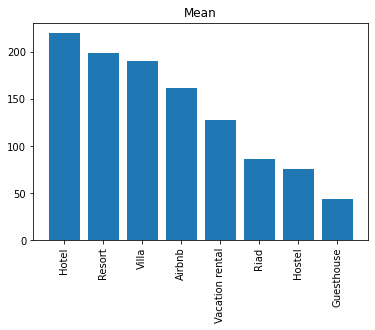

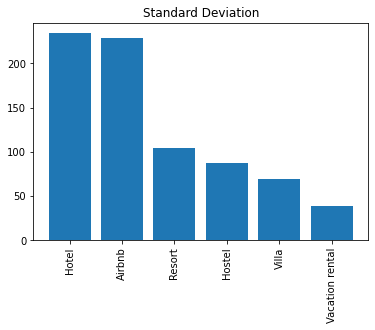

Mean values accommodation_type
Hotel              220.0
Resort             199.0
Villa              191.0
Airbnb             162.0
Vacation rental    128.0
Riad                86.0
Hostel              76.0
Guesthouse          44.0
Name: acc_daily_cost, dtype: float64 Standard Deviation values accommodation_type
Hotel              234.0
Airbnb             229.0
Resort             105.0
Hostel              88.0
Villa               69.0
Vacation rental     39.0
Guesthouse           NaN
Riad                 NaN
Name: acc_daily_cost, dtype: float64


In [165]:
get_mean_by_groups(df, 'accommodation_type', 'acc_daily_cost')

In [166]:
acc_counts = df.accommodation_type.value_counts()
acc_counts

Hotel              60
Airbnb             30
Hostel             24
Resort             14
Villa               4
Vacation rental     3
Riad                1
Guesthouse          1
Name: accommodation_type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Hotel'),
  Text(1, 0, 'Airbnb'),
  Text(2, 0, 'Hostel'),
  Text(3, 0, 'Resort'),
  Text(4, 0, 'Villa'),
  Text(5, 0, 'Vacation rental'),
  Text(6, 0, 'Riad'),
  Text(7, 0, 'Guesthouse')])

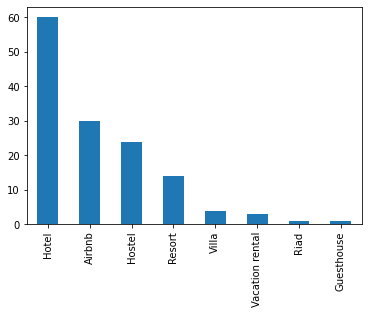

In [167]:
acc_counts.plot(kind='bar')
plt.xticks(rotation=90)

In [168]:
df_accommodation = df.loc[:,['accommodation_type', 'acc_daily_cost']]
df_accommodation
df_accommodation.groupby('accommodation_type').describe().round()

acc_daily_cost                                            \
                            count   mean    std    min    25%    50%    75%   
accommodation_type                                                            
Airbnb                       30.0  162.0  229.0   44.0   68.0   95.0  126.0   
Guesthouse                    1.0   44.0    NaN   44.0   44.0   44.0   44.0   
Hostel                       24.0   76.0   88.0   17.0   32.0   50.0   58.0   
Hotel                        60.0  220.0  234.0   14.0  120.0  153.0  200.0   
Resort                       14.0  199.0  105.0   71.0  110.0  174.0  292.0   
Riad                          1.0   86.0    NaN   86.0   86.0   86.0   86.0   
Vacation rental               3.0  128.0   39.0   89.0  109.0  129.0  148.0   
Villa                         4.0  191.0   69.0  136.0  141.0  171.0  221.0   

                            
                       max  
accommodation_type          
Airbnb              1000.0  
Guesthouse            44.0  
Hostel               333.0  
Hotel               1143.0  
Resort               375.0  
Riad                  86.0  
Vacation rental      167.0  
Villa                286.0

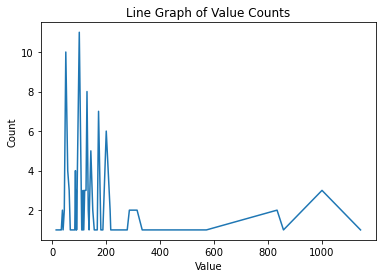

In [169]:
df_accommodation2 = df_accommodation['acc_daily_cost'].value_counts()
ax = sns.lineplot(x=df_accommodation2.index, y=df_accommodation2.values)

plt.title('Line Graph of Value Counts')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

(array([15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  44.44444444,   92.22222222,  140.        ,  187.77777778,
         235.55555556,  283.33333333,  331.11111111,  378.88888889,
         426.66666667,  474.44444444,  522.22222222,  570.        ,
         617.77777778,  665.55555556,  713.33333333,  761.11111111,
         808.88888889,  856.66666667,  904.44444444,  952.22222222,
        1000.        ]),
 <BarContainer object of 20 artists>)

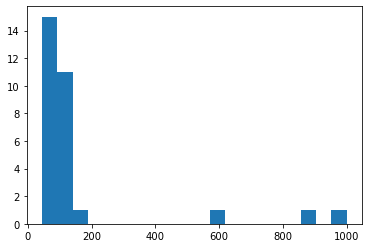

In [170]:
df_accommodation3 = df_accommodation[(df_accommodation['accommodation_type'] == 'Airbnb')]
df_accommodation4 = df_accommodation3['acc_daily_cost'].value_counts()
plt.hist(df_accommodation3['acc_daily_cost'], bins = 20)

Lets see which mode of transportation varies the most. We will do that by calculating the coefficient of variation, which measures the ratio of the standard deviation to the mean.

In [171]:
df_accommodation3.max()

accommodation_type    Airbnb
acc_daily_cost        1000.0
dtype: object

In [172]:
df_accommodation.groupby(['accommodation_type'])['acc_daily_cost'].std()/df_accommodation.groupby(['accommodation_type'])['acc_daily_cost'].mean()

accommodation_type
Airbnb             1.408889
Guesthouse              NaN
Hostel             1.166833
Hotel              1.068157
Resort             0.525212
Riad                    NaN
Vacation rental    0.303740
Villa              0.361716
Name: acc_daily_cost, dtype: float64

In [173]:
df_accommodation['acc_daily_cost'].mode()

0    100.0
dtype: float64

Now I will look into the cost of accommodation per destinantion. Which places are the most expensive and the cheapest to stay in?

Let's first clean this collumn to get only the countries

In [181]:
df[['city_destination','country_destination']] = df.destination.str.split(',', expand = True)

In [182]:
df.country_destination = df.country_destination.str.strip()

In [183]:
df.country_destination = df.country_destination.replace('AUS', 'Australia')

In [184]:
df.country_destination = df.country_destination.replace('Aus', 'Australia')

In [187]:
df.country_destination = df.country_destination.replace('SA', 'South Africa')

In [189]:
df.country_destination = df.country_destination.replace('Thai', 'Thailand')

In [190]:
df.country_destination.unique()

array(['UK', 'Thailand', 'Indonesia', 'USA', 'Japan', 'France',
       'Australia', 'Brazil', 'Netherlands', 'United Arab Emirates',
       'Mexico', 'Spain', 'Hawaii', 'Germany', 'Morocco', 'Scotland',
       None, 'Canada', 'South Korea', 'Italy', nan, 'South Africa',
       'Greece', 'New Zealand'], dtype=object)

In [191]:
df_places = df.loc[:,['country_destination', 'acc_daily_cost']]
df_places
df_places.groupby('country_destination').describe().round()

acc_daily_cost                                         \
                              count    mean    std     min     25%     50%   
country_destination                                                          
Australia                       7.0   226.0  342.0    50.0    81.0   114.0   
Brazil                          4.0   167.0   81.0    89.0   119.0   150.0   
Canada                          2.0   445.0  549.0    57.0   251.0   445.0   
France                          7.0   271.0  258.0    50.0   171.0   171.0   
Germany                         1.0   156.0    NaN   156.0   156.0   156.0   
Greece                          1.0    70.0    NaN    70.0    70.0    70.0   
Hawaii                          1.0   375.0    NaN   375.0   375.0   375.0   
Indonesia                       5.0    90.0   35.0    50.0    71.0    86.0   
Italy                           4.0   204.0  250.0    14.0    79.0   114.0   
Japan                           7.0   228.0  342.0    50.0    81.0   111.0   
Mexico                          4.0   183.0   89.0   114.0   136.0   153.0   
Morocco                         1.0    86.0    NaN    86.0    86.0    86.0   
Netherlands                     2.0   154.0   24.0   138.0   146.0   154.0   
New Zealand                     1.0  1000.0    NaN  1000.0  1000.0  1000.0   
Scotland                        1.0   129.0    NaN   129.0   129.0   129.0   
South Africa                    2.0   189.0  204.0    44.0   117.0   189.0   
South Korea                     1.0    62.0    NaN    62.0    62.0    62.0   
Spain                           4.0   286.0  381.0    86.0    87.0   101.0   
Thailand                        6.0   123.0   89.0    50.0    64.0    92.0   
UK                              3.0   142.0   26.0   125.0   127.0   129.0   
USA                             6.0   348.0  391.0   143.0   179.0   207.0   
United Arab Emirates            1.0   357.0    NaN   357.0   357.0   357.0   

                                      
                         75%     max  
country_destination                   
Australia              129.0  1000.0  
Brazil                 198.0   278.0  
Canada                 639.0   833.0  
France                 250.0   833.0  
Germany                156.0   156.0  
Greece                  70.0    70.0  
Hawaii                 375.0   375.0  
Indonesia              100.0   143.0  
Italy                  239.0   571.0  
Japan                  138.0  1000.0  
Mexico                 200.0   314.0  
Morocco                 86.0    86.0  
Netherlands            163.0   171.0  
New Zealand           1000.0  1000.0  
Scotland               129.0   129.0  
South Africa           261.0   333.0  
South Korea             62.0    62.0  
Spain                  300.0   857.0  
Thailand               145.0   286.0  
UK                     150.0   171.0  
USA                    214.0  1143.0  
United Arab Emirates   357.0   357.0

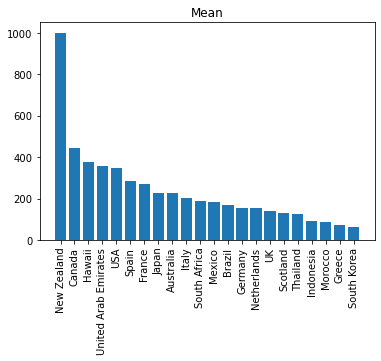

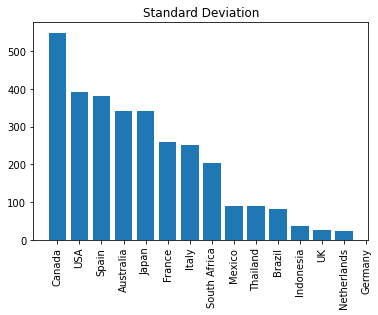

Mean values country_destination
New Zealand             1000.0
Canada                   445.0
Hawaii                   375.0
United Arab Emirates     357.0
USA                      348.0
Spain                    286.0
France                   271.0
Japan                    228.0
Australia                226.0
Italy                    204.0
South Africa             189.0
Mexico                   183.0
Brazil                   167.0
Germany                  156.0
Netherlands              154.0
UK                       142.0
Scotland                 129.0
Thailand                 123.0
Indonesia                 90.0
Morocco                   86.0
Greece                    70.0
South Korea               62.0
Name: acc_daily_cost, dtype: float64 Standard Deviation values country_destination
Canada                  549.0
USA                     391.0
Spain                   381.0
Australia               342.0
Japan                   342.0
France                  258.0
Italy                  

In [192]:
get_mean_by_groups(df, 'country_destination', 'acc_daily_cost')

### Accommodation main insights
- Airbnbs vary a lot in prices - they can cost from \\$229 to \\$1000 a night, but most people end up chosing to stay in places up to about \\$200 a night
- The most expensive accommodation is hotel, costing an average of \\$220 a night.
- The cheapest way to spend the night while traveling is staying in guesthouses, which cost an average of \\$44 a night.


## Transportation <a class="anchor" id="transportation"></a>

In [193]:
df.transportation_cost.unique()

array(['600', '500', '700', '1000', '200', '800', '1200', '100', '400',
       '150', '$400 ', '$700 ', '$150 ', '$800 ', '$100 ', '$600 ',
       '$80 ', '$500 ', '$300 ', '$50 ', '$120 ', '$75 ', '900', '50',
       '$200 ', '$250 ', '$20 ', '300', nan, '800 USD', '200 USD',
       '500 USD', '700 USD', '300 USD', '600 USD', '400 USD', '1000 USD',
       '100 USD', '350 USD', '150 USD', '$1,200 ', '$900 ', '$1,500 ',
       '$1,000 ', '250', '2500', '1500', '2000', '3000'], dtype=object)

In [194]:
df.transportation_cost = df.transportation_cost.replace({' USD': ''}, regex = True)

In [195]:
df.transportation_cost = df.transportation_cost.str.replace('$', '', regex = True)

In [196]:
df.transportation_cost = df.transportation_cost.replace({',': ''}, regex = True) 

In [197]:
df.transportation_cost = df.transportation_cost.astype(float)

In [198]:
df['transport_daily_cost'] = df.transportation_cost/df.duration_days

In [199]:
df.transportation_type.value_counts()

Plane         57
Train         37
Flight        13
Car rental    13
Bus            6
Airplane       5
Car            3
Subway         1
Ferry          1
Name: transportation_type, dtype: int64

In [200]:
df.transportation_type = df.transportation_type.str.replace('Plane', 'Airplane', regex = True)

In [201]:
df.transportation_type = df.transportation_type.str.replace('Flight', 'Airplane', regex = True)

In [202]:
df_transport = df.loc[:,['transportation_type', 'transport_daily_cost']]
df_transport

,transportation_type,transport_daily_cost
0,Airplane,85.714286
1,Airplane,100.000000
2,Airplane,100.000000
3,Airplane,71.428571
4,Train,28.571429
...,...,...
134,Car,222.222222
135,Airplane,500.000000
136,Train,142.857143
137,Airplane,357.142857


In [203]:
describe_transport = df_transport.groupby('transportation_type').describe().round()
describe_transport 

transport_daily_cost                                    \
                                   count   mean    std   min    25%    50%   
transportation_type                                                          
Airplane                            75.0  122.0   90.0  32.0   80.0  100.0   
Bus                                  6.0   10.0    5.0   6.0    7.0    9.0   
Car                                  3.0  159.0  109.0  33.0  128.0  222.0   
Car rental                          13.0   40.0   12.0  22.0   31.0   38.0   
Ferry                                1.0   21.0    NaN  21.0   21.0   21.0   
Subway                               1.0    2.0    NaN   2.0    2.0    2.0   
Train                               37.0   48.0   71.0  11.0   17.0   22.0   

                                   
                       75%    max  
transportation_type                
Airplane             131.0  500.0  
Bus                   11.0   20.0  
Car                  222.0  222.0  
Car rental            50.0   60.0  
Ferry                 21.0   21.0  
Subway                 2.0    2.0  
Train                 36.0  357.0

Lets see which mode of transportation varies the most. We will do that by calculating the coefficient of variation, which measures the ratio of the standard deviation to the mean.

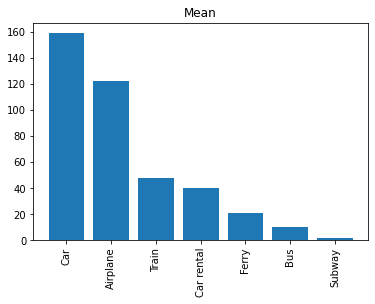

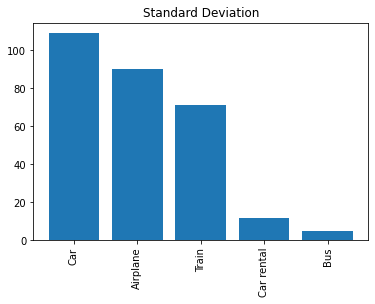

Mean values transportation_type
Car           159.0
Airplane      122.0
Train          48.0
Car rental     40.0
Ferry          21.0
Bus            10.0
Subway          2.0
Name: transport_daily_cost, dtype: float64 Standard Deviation values transportation_type
Car           109.0
Airplane       90.0
Train          71.0
Car rental     12.0
Bus             5.0
Ferry           NaN
Subway          NaN
Name: transport_daily_cost, dtype: float64


In [204]:
get_mean_by_groups(df, 'transportation_type', 'transport_daily_cost')

In [205]:
df_transport.groupby(['transportation_type'])['transport_daily_cost'].std()/ df_transport.groupby(['transportation_type'])['transport_daily_cost'].mean()

transportation_type
Airplane      0.735993
Bus           0.516078
Car           0.684764
Car rental    0.298654
Ferry              NaN
Subway             NaN
Train         1.473730
Name: transport_daily_cost, dtype: float64

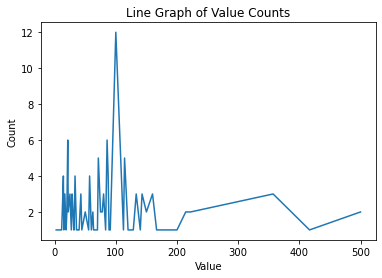

In [206]:
df_transport2 = df_transport['transport_daily_cost'].value_counts()
ax = sns.lineplot(x=df_transport2.index, y=df_transport2.values)

plt.title('Line Graph of Value Counts')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [207]:
df_transport2

100.000000    12
85.714286      6
21.428571      6
71.428571      5
114.285714     5
              ..
11.428571      1
200.000000     1
70.000000      1
83.333333      1
10.000000      1
Name: transport_daily_cost, Length: 65, dtype: int64

(array([32., 21., 18., 31.,  8., 10.,  4.,  2.,  4.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  1.,  0.,  0.,  2.]),
 array([  2.5  ,  27.375,  52.25 ,  77.125, 102.   , 126.875, 151.75 ,
        176.625, 201.5  , 226.375, 251.25 , 276.125, 301.   , 325.875,
        350.75 , 375.625, 400.5  , 425.375, 450.25 , 475.125, 500.   ]),
 <BarContainer object of 20 artists>)

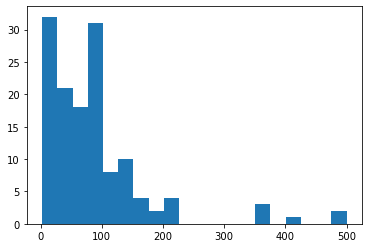

In [208]:
plt.hist(df_transport['transport_daily_cost'], bins = 20)

### Transportation main insights
- Cars are the most expensive mode of transport with an average cost of \\$159 on the daily travel budget. 
- Among all modes of transport, travelling by train varies the most in price (from \\$11 to \\$357). 
- Travelling by bus is the cheapest way to travel, costing an average of \\$10 of the daily travel budget.
- Most people spend up to about \\$220 of their daily travel budget on transport (this is diluting the cost of the travel to destination by day).

In [209]:
def revert_col_names(df):
    new_cols = []
    for col in df.columns:
        new_col = col.strip().replace('_', ' ').title()
        new_cols.append(new_col)
    df.columns = new_cols
    
    return df

## Export data to excel <a class="anchor" id="export"></a>

In [210]:
revert_col_names(df)

,Trip Id,Destination,Start Date,End Date,Duration Days,Traveler Name,Traveler Age,Traveler Gender,Traveler Nationality,Accommodation Type,Accommodation Cost,Transportation Type,Transportation Cost,Acc Daily Cost,City Destination,Country Destination,Transport Daily Cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200.0,Airplane,600.0,171.428571,London,UK,85.714286
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800.0,Airplane,500.0,160.000000,Phuket,Thailand,100.000000
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000.0,Airplane,700.0,142.857143,Bali,Indonesia,100.000000
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000.0,Airplane,1000.0,142.857143,New York,USA,71.428571
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700.0,Train,200.0,100.000000,Tokyo,Japan,28.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500.0,Car,2000.0,277.777778,Rio de Janeiro,Brazil,222.222222
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000.0,Airplane,3000.0,833.333333,Vancouver,Canada,500.000000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000.0,Train,1000.0,285.714286,Bangkok,Thailand,142.857143
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000.0,Airplane,2500.0,857.142857,Barcelona,Spain,357.142857


In [211]:
df.to_excel("traveler-data.xlsx") 